# Mushroom Project

**Data Set Information:**<br>
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as **definitely edible, definitely poisonous, or(/) of unknown edibility and not recommended**.<br>
This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

# Importing Libraries and Data

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [37]:
df = pd.read_csv("mushrooms.csv")

We have loaded the dataset and libraries

In [38]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [39]:
df.shape

(8124, 23)

There are **8124 Rows and 23 Columns**, in which our target column or variabe would be "Class"

In [40]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [41]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

**e - Edible and p- Poisonous.** <br>
This would be a **Bi-Classification** problem and by the value counts this would be a **Balanced dataset Problem**.<br>
We can use **Accuracy Score** while building a model

<AxesSubplot:xlabel='class', ylabel='count'>

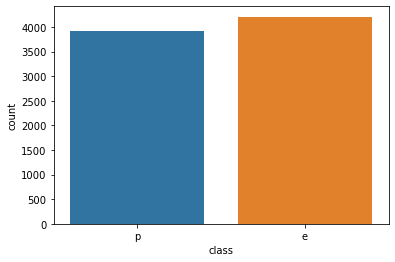

In [42]:
sns.countplot(df['class'])

## Let us understand other columns/features

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

There are **No Null Values**. All the features are Object type.<br>
Lets encode them

In [44]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

for columns in df.columns:
    df[columns] = le.fit_transform(df[columns])

In [45]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [46]:
df = df + 1

In [47]:
df['class'] = df['class']-1

In [48]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,6,3,5,2,7,2,1,2,5,...,3,8,8,1,3,2,5,3,4,6
1,0,6,3,10,2,1,2,1,1,5,...,3,8,8,1,3,2,5,4,3,2
2,0,1,3,9,2,4,2,1,1,6,...,3,8,8,1,3,2,5,4,3,4
3,1,6,4,9,2,7,2,1,2,6,...,3,8,8,1,3,2,5,3,4,6
4,0,6,3,4,1,6,2,2,1,5,...,3,8,8,1,3,2,1,4,1,2


Encoded the data using Label Encoder. Lets understand the data distribution.<br>
**1 -Poisonous and 0 - Edible**<br>

**Note**:<br>
Added 1 to every column so that we do not get any issues while treating skewness

In [49]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,4.348104,2.827671,5.504677,1.415559,5.144756,1.974151,1.161497,1.309207,5.810684,...,2.603644,6.816347,6.794682,1.0,2.965534,2.069424,3.291974,4.596750,4.644018,2.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,3.000000,1.000000,4.000000,1.000000,3.000000,2.000000,1.000000,1.000000,3.000000,...,2.000000,7.000000,7.000000,1.0,3.000000,2.000000,1.000000,3.000000,4.000000,1.000000
50%,0.000000,4.000000,3.000000,5.000000,1.000000,6.000000,2.000000,1.000000,1.000000,6.000000,...,3.000000,8.000000,8.000000,1.0,3.000000,2.000000,3.000000,4.000000,5.000000,2.000000
75%,1.000000,6.000000,4.000000,9.000000,2.000000,6.000000,2.000000,1.000000,2.000000,8.000000,...,3.000000,8.000000,8.000000,1.0,3.000000,2.000000,5.000000,8.000000,5.000000,3.000000
max,1.000000,6.000000,4.000000,10.000000,2.000000,9.000000,2.000000,2.000000,2.000000,12.000000,...,4.000000,9.000000,9.000000,1.0,4.000000,3.000000,5.000000,9.000000,6.000000,7.000000


As we have 23 columns let me look at the correlation of the features with respect to our target feature **class**.

In [50]:
corr_matrix = df.corr()
corr_matrix['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

In [51]:
df['veil-type'].value_counts()

1    8124
Name: veil-type, dtype: int64

We can observe that all the features are important. The feature "veil-type" is same for both Poisonous and Edible Mushrooms.<br>
We should remove this features as this has no effect on our target feature.

# Let's Visulalize our data

In [52]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [53]:
list1 = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',]

list2 = ['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color','stalk-shape']

list3 = ['stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring','stalk-color-below-ring']

list4 = ['veil-type', 'veil-color', 'ring-number','ring-type', 'spore-print-color', 'population', 'habitat']

To ease our Visulaizations, I have divided the columns into 4 list and we will iterate to understand the particular features and move forward

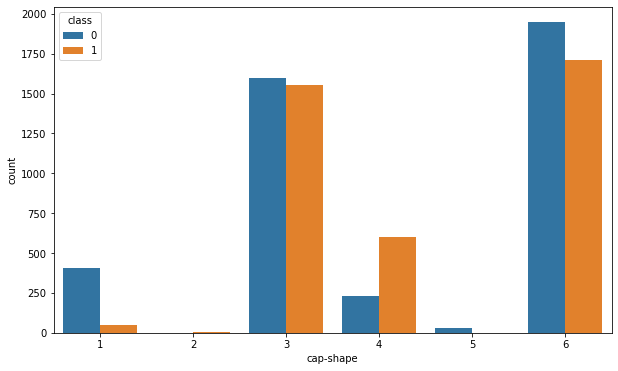

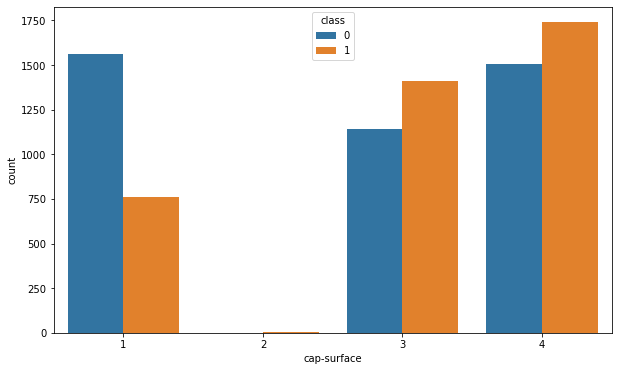

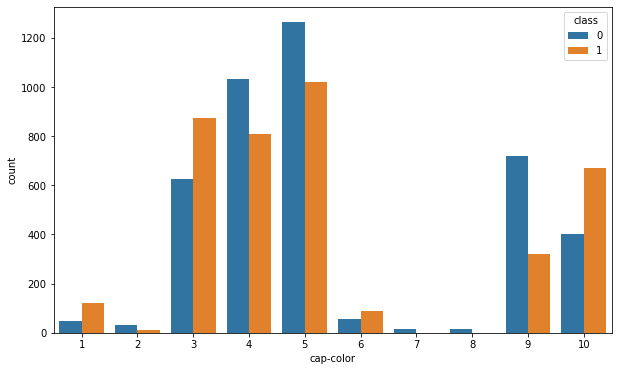

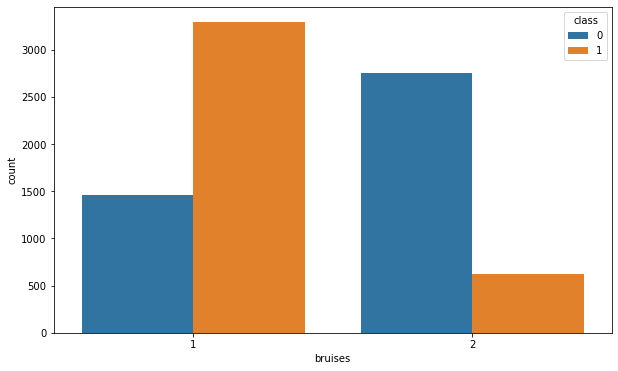

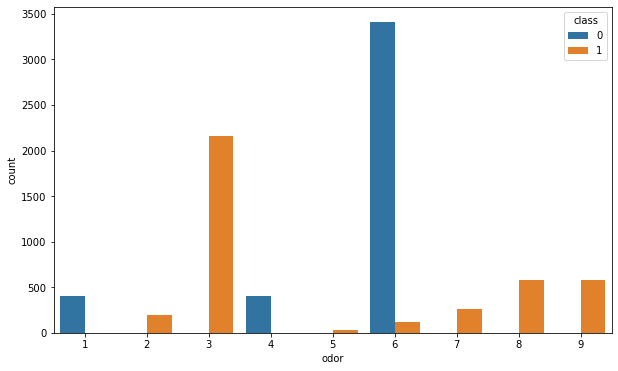

In [54]:
for i in list1:
    plt.figure(figsize=(10,6))
    sns.countplot(df[i], hue=df['class'])

**Observations** <br>
1) With **cap-size**:<br>
    Category 1 has more Edible Mushrooms then Posionous. Category 4 has the opposite, has more Poisonous Mushrooms.<br>
    Category 2 has only 1 or 2 Poison Mushrooms, category 5 has only Edible Mushrooms.<br>
    Category 3 and 6 have the most Mushroom values, slightly influenced by Edible Mushrooms.<br>
2) With **cap-surface**:<br>
    Only category 1 has more edible Mushrooms registred, all the other categories has a slightly more influnce of Posion Mushrooms.<br>
3) With **cap-color**:<br>
    This is a highly distributed feature with 9 categorical variable or 9 colors.<br>
4) With **bruises**:<br>
    This column has only two categories with 1 being influcend by Posion Mushrooms and 2 category influenced by Edible Mushrooms.<br>
5) With **odor**:<br>
    There are 8 types of odor for Mushrooms and looking at the plot we can easily say that, only 3 categories (1, 4, 6) are Edible and all the other Categories are Poisonous.<br>

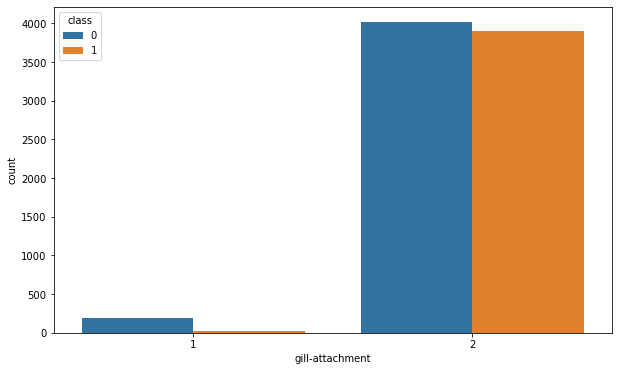

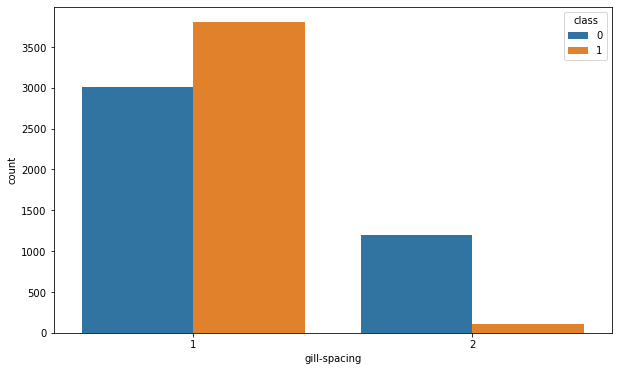

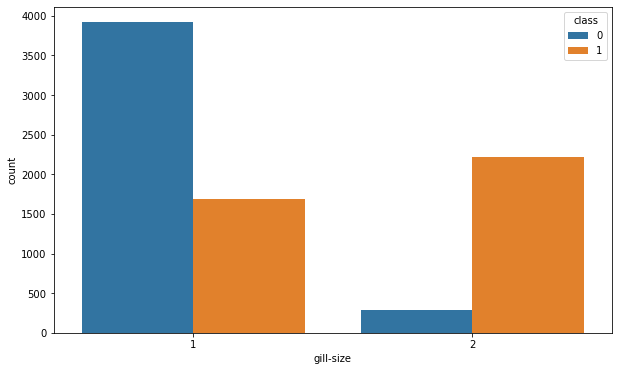

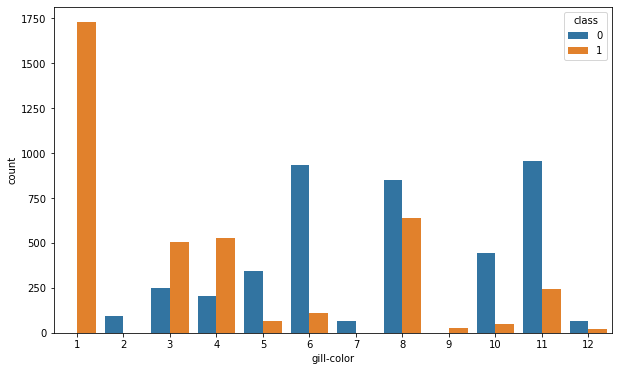

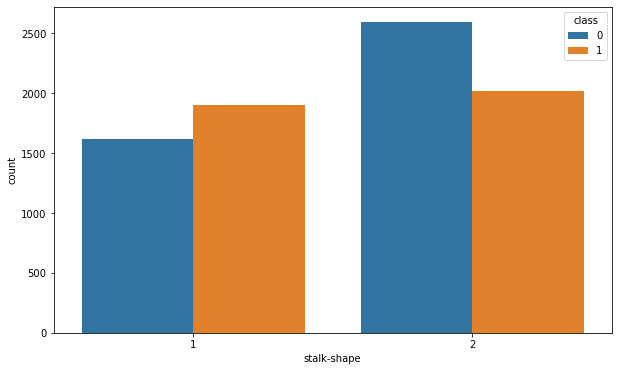

In [55]:
for i in list2:
    plt.figure(figsize=(10,6))
    sns.countplot(df[i], hue=df['class'])

**Observations** <br>
6) With **gill-attachment**:<br>
    Category 1 has less Mushroom values and 2 has the most of the values. Both the categories are slightly influenced by Edible Mushrooms. <br>
7) With **gill-spacing**:<br>
    Two categories for this feature. Category 1 has most of the Mushroom values and influnced by Poison Mushrooms.<br>
    category 2 has more Edible Mushrooms. <br>
8) With **gill-size**:<br>
    There are only two sizes for a Mushroom in terms of gill-size. Category 1 has most Edible Mushrooms and 2 most posionous.<br>
8) With **gill-color**:<br>
    This feature or Mushrooms in general have 11 gill color. In which category 1 is always poisonous.<br>
10) With **stalk-shape**:<br>
    There only two type of stalk-shape and both the categories seems to have a slight imbalances in terms of value influence.<br>

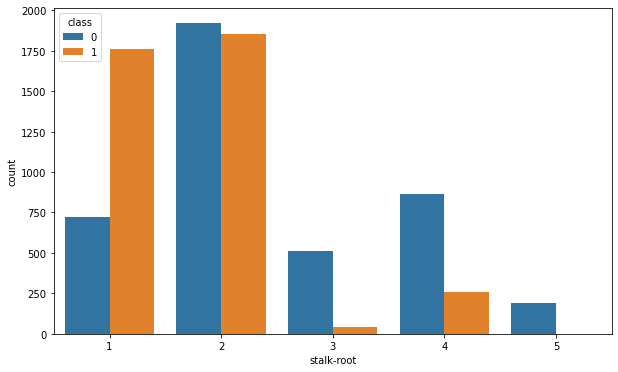

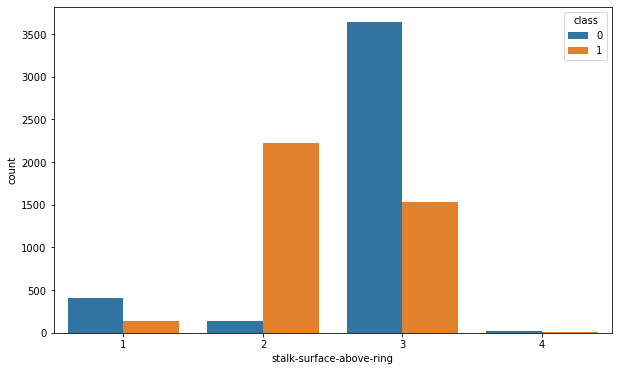

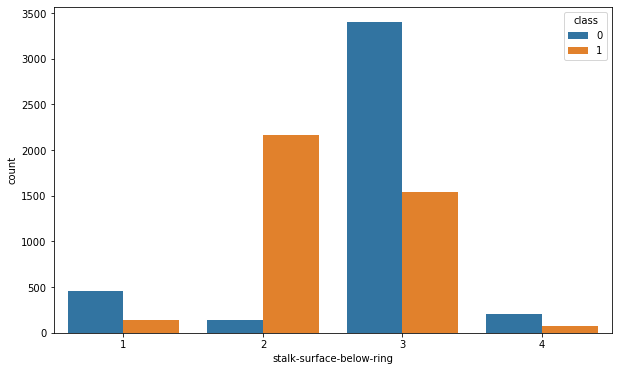

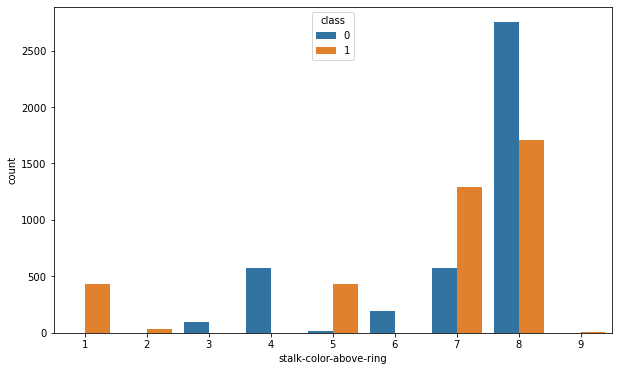

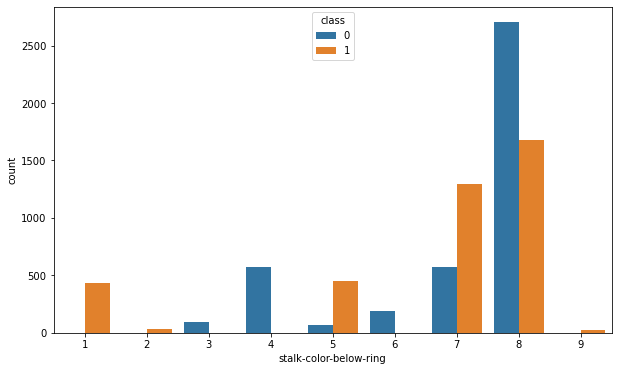

In [56]:
for i in list3:
    plt.figure(figsize=(10,6))
    sns.countplot(df[i], hue=df['class'])

**Observations** <br>
11) With **stalk-root**:<br>
    This column has 5 categories and category 2 and 3 has most of the Mushrooms.  <br>
12) With **stalk-surface-above-ring**:<br>
    There are 4 categories, 2 and 3 have most of the Mushrooms, with 2 influnced by Poisonous Mushrooms and 3 with Edible Mushrooms. <br>
13) With **stalk-surface-below-ring**:<br>
    Same is the case with this column. Both "stalk-surface-above-ring" and "stalk-surface-below-ring" has same trends. <br>
14) With **stalk-color-above-ring**:<br>
    There are 8 categories, in which 3, 4, 6 and 8 are influence by Edible Mushrooms.<br>
    All the other categories are influence by Posion Mushrooms.<br>
15) With **stalk-color-below-ring**:<br>
    Same is the case here as "stalk-color-above-ring".<br>

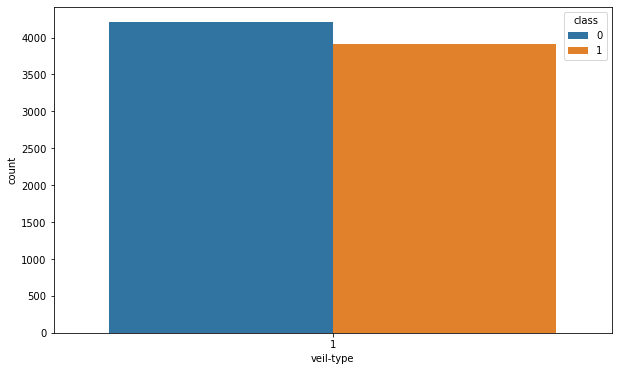

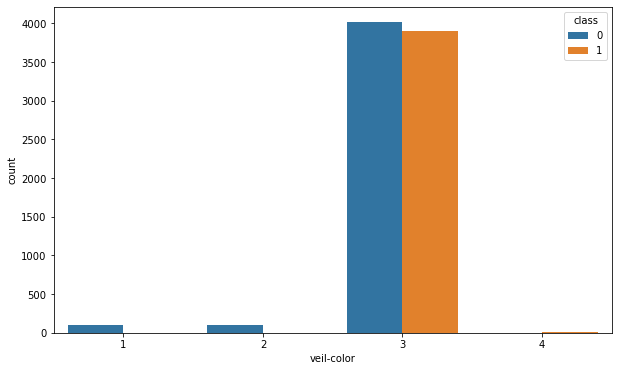

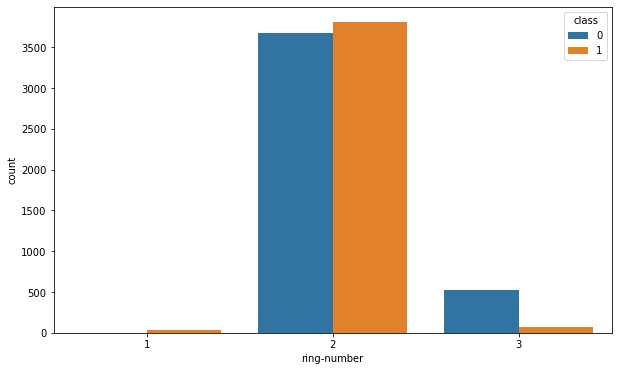

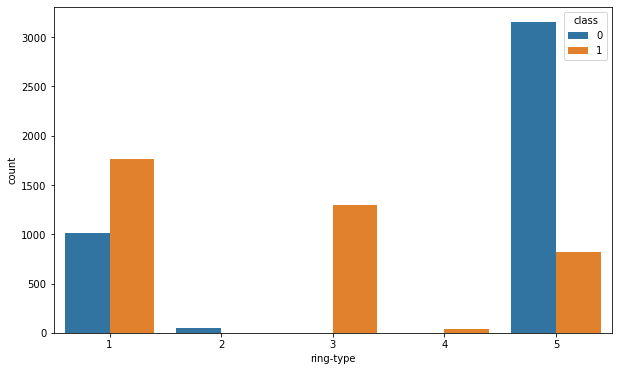

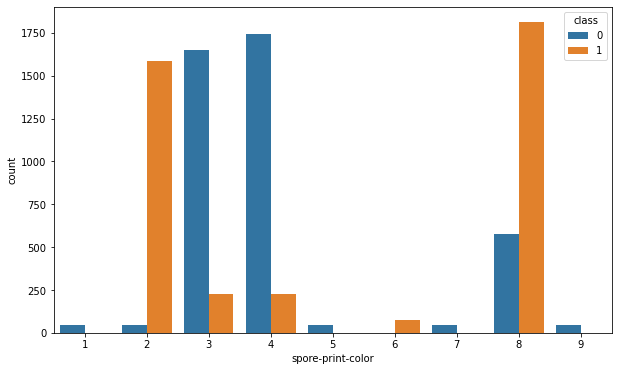

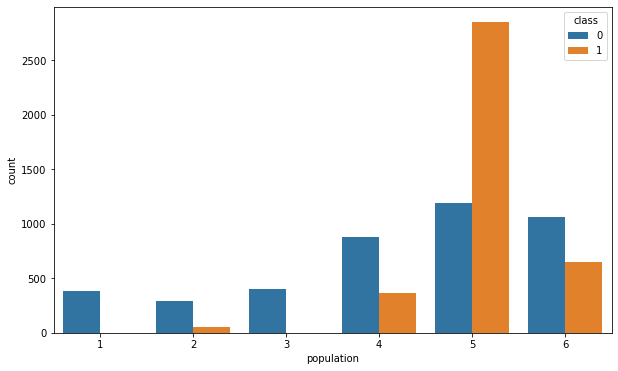

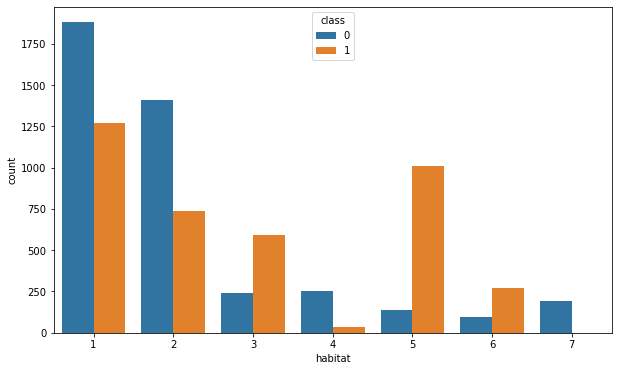

In [57]:
for i in list4:
    plt.figure(figsize=(10,6))
    sns.countplot(df[i], hue=df['class'])

# **Observations** <br>
16) With **veil-type**:<br>
    This column has only 1 category and has Edible Mushrooms slightly more than Poison Mushrooms.<br>
17) With **veil-color**:<br>
    There are 4 types of veil-colors and categories 1 and 2 are only Edible Mushrooms, category 3 has most values registered where Edible Mushrooms are slightly more.<br>
    Category 3 has only Posion Mushrooms.<br>
18) With **ring-number**:<br>
    This feature has 3 type of ring numbers, with most of the Mushrooms in category 2. <br>
19) With **ring-type**:<br>
        There are 5 types of ring types, in which category 3 and 4 are Edible Mushrooms. category 2 is for Posion Mushrooms with category 5 being influced by Posion Mushrooms.<br>
    Category 0 has more Edible Mushrooms. <br>
20) With **spore-print-color**:<br>
    category 1, 3, 4, 5, 7 and 9 has most Edible Mushrooms.<br>
    category 2 and 8 has most Posion Mushrooms. <br>
21) With **population**:<br>
    There are 6 categories in this features and category 1, 2, 3, 4 and 6 are dominated by Edible Mushrooms, whereas category 5 dominated with Poison Mushrooms. <br>
22) With **habitat**:<br>
    There are 7 categories and seems to be right skewed. Category 1, 2, 4 and 7 being influenced by Edible Mushrooms. <br>
    Categories 3, 5 and 6 are dominated by Posion Mushrooms.

## Data distribution among all columns.

<AxesSubplot:>

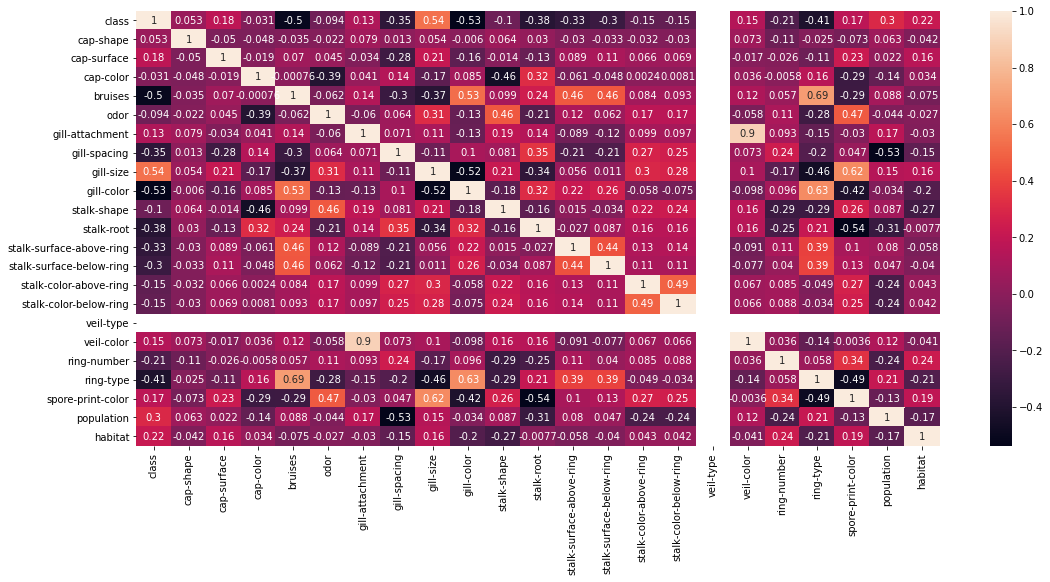

In [60]:
plt.figure(figsize= (18,8))
sns.heatmap(df.corr(), annot = True)

We aren't able to make out all the realtions easily, however, 'veil-type' shows no ups and downs. As we alreday know that it only contains one category.

In [64]:
corr_matrix = df.corr()
corr_matrix['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

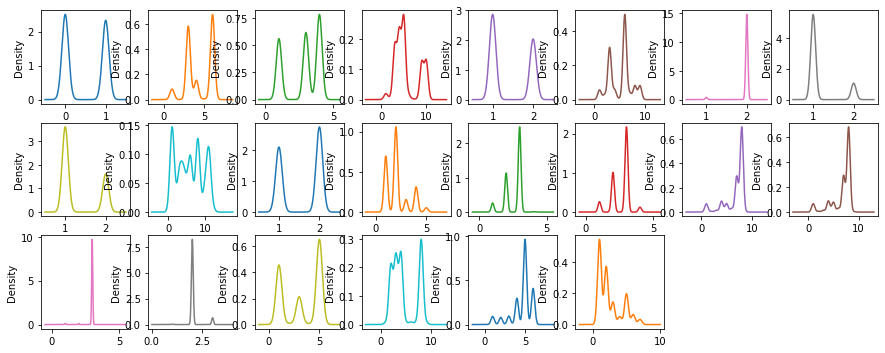

In [61]:
df.drop('veil-type',axis=1).plot(kind="density", subplots =True, layout=(5,8), sharex=False, legend =False, figsize=(15,10))
plt.show()

There is high skewness in data. We will treat skewness in further steps.

In [62]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [65]:
x = df.drop(['class','veil-type'], axis=1)
y = df['class']

In [66]:
x.shape

(8124, 21)

In [67]:
y.shape

(8124,)

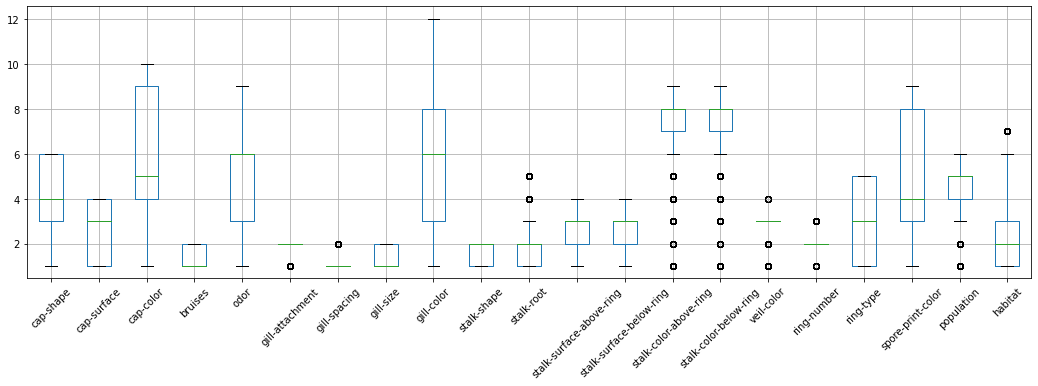

In [68]:
x.boxplot(figsize=(18,6))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

## **Outliers**

In [69]:
from scipy.stats import zscore
z = np.abs(zscore(x))
z

array([[1.02971224, 0.14012794, 0.19824983, ..., 0.67019486, 0.5143892 ,
        2.03002809],
       [1.02971224, 0.14012794, 1.76587407, ..., 0.2504706 , 1.31310821,
        0.29572966],
       [2.08704716, 0.14012794, 1.37304929, ..., 0.2504706 , 1.31310821,
        0.86714922],
       ...,
       [0.8403434 , 0.14012794, 0.19824983, ..., 1.50964337, 2.11182722,
        0.28570978],
       [0.21699152, 0.95327039, 0.19824983, ..., 1.42842641, 0.28432981,
        0.28570978],
       [1.02971224, 0.14012794, 0.19824983, ..., 0.16925365, 2.11182722,
        0.28570978]])

In [70]:
Thresold = 3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([14, 13, 14, ..., 15,  5, 15], dtype=int64))


In [71]:
data = x[(z<3).all(axis=1)]

In [72]:
data.shape

(6568, 21)

In [73]:
x.shape

(8124, 21)

In [74]:
data.skew()

cap-shape                  -0.234646
cap-surface                -0.630373
cap-color                   0.811934
bruises                     0.124508
odor                       -0.172451
gill-attachment             0.000000
gill-spacing                1.910296
gill-size                   0.489136
gill-color                  0.048010
stalk-shape                -0.881319
stalk-root                  0.777382
stalk-surface-above-ring   -1.381335
stalk-surface-below-ring   -0.989929
stalk-color-above-ring     -1.776145
stalk-color-below-ring     -1.681096
veil-color                  0.000000
ring-number                 0.000000
ring-type                  -0.231353
spore-print-color           0.697445
population                 -1.737467
habitat                     0.987162
dtype: float64

Removing **Outliers** reduced the data set by **20%**. Which isn't acceptable as this amount of data loss is not appreciated.

## Skewness.

In [80]:
x.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [78]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

In [79]:
df_new.skew()

cap-shape                  -0.176933
cap-surface                -0.404068
cap-color                   0.000160
bruises                     0.342750
odor                       -0.110377
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                 -0.179022
stalk-shape                -0.271345
stalk-root                  0.065220
stalk-surface-above-ring   -0.349340
stalk-surface-below-ring   -0.059979
stalk-color-above-ring     -0.889051
stalk-color-below-ring     -0.848470
veil-color                  5.857808
ring-number                -0.827033
ring-type                  -0.293444
spore-print-color           0.058085
population                 -0.288538
habitat                     0.184645
dtype: float64

In [81]:
x = df_new

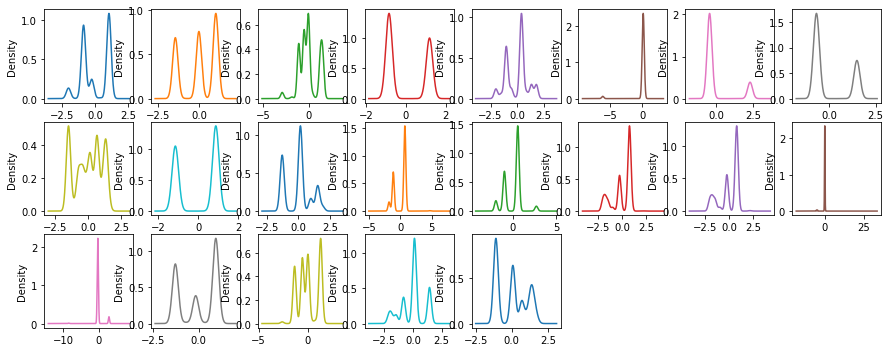

In [82]:
x.plot(kind="density", subplots =True, layout=(5,8), sharex=False, legend =False, figsize=(15,10))
plt.show()

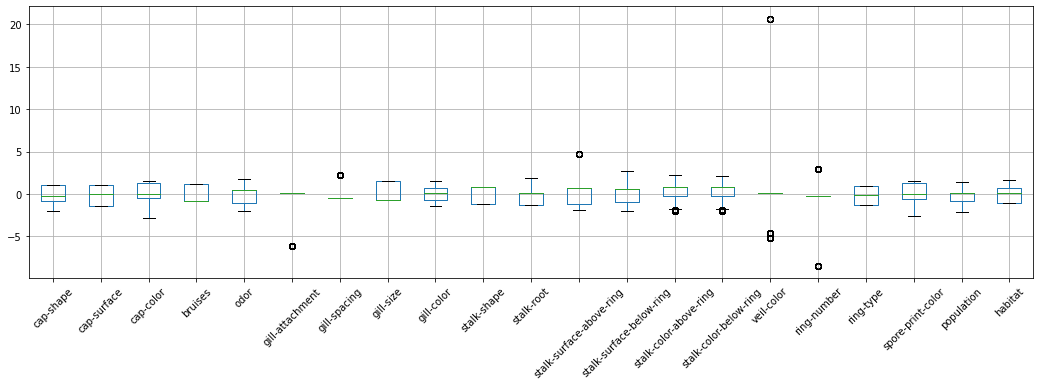

In [86]:
x.boxplot(figsize=(18,6))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

As we are not able to reduce the skewness under 0.5, I will use Ensemble and Tree techiniques to build a model as they are not sensitives to outliers and skewness (I prefer not to lose any data, however, column 'veil-type' has no use in out model).

# **Model Building**

## Finding the best random state for the model

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [93]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.9636923076923077 on random state 164


we have found that the at random state 164 we have maximum accuracy.

## Creating train_test_split

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=164)

Now we will try out every model and look at the Accuracy Score.

In [99]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.9636923076923077
[[802  24]
 [ 35 764]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       826
           1       0.97      0.96      0.96       799

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [100]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 1.0
[[826   0]
 [  0 799]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00       799

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [101]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 1.0
[[826   0]
 [  0 799]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00       799

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [102]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 1.0
[[826   0]
 [  0 799]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00       799

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [103]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 1.0
[[826   0]
 [  0 799]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00       799

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [104]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 1.0
[[826   0]
 [  0 799]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00       799

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



We are getting 100% accuracy for RandomForest, DecisionTree, SVC, AdaBoost and Kneighbors as well. This might be due to Overfitting (Highly unlikely).<br>
## Crossvalidation.

In [109]:
from sklearn.model_selection import cross_val_score
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 0.8888126563092079


In [110]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 0.9113500568397119


In [112]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc.mean())

Cross validation score of Kneigbors Classifier: 0.8752707843880257


In [115]:
svc1 = cross_val_score(sv, x, y, cv=5)

print("Cross validation score of Support Vector Classifier:", svc1.mean())

Cross validation score of Support Vector Classifier: 0.8629564986737399


In [116]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression Classifier:", lrc.mean())

Cross validation score of Logistic Regression Classifier: 0.8156926108374384


Out of all the Algorithms we tried **Decision Tree Classifiers** gives us a Accuracy of **91.13%**.<br>
We cannot Cross Validate **AdaBoostClasifier** as this algorithm Boosts each models to the next, with 5 cross validations internally improving the Accuracy by itself.<br>
So, AdaBoostClasifier and DecisionTreeClasifier Stands out.

## Hyperparameter Tuning

To improve the Accuracy further.

In [117]:
from sklearn.model_selection import GridSearchCV

In [121]:
#Creating parameter list to pass in GridsearchCV

parameters = {'max_depth': np.arange(2,15),
              'criterion':['gini','entropy']}

In [122]:
GCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [123]:
#Printing the best parameters.
GCV.best_params_

{'criterion': 'gini', 'max_depth': 7}

## Model

In [126]:
model = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, random_state = 164)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

100.0


## Saving the Model

In [128]:
import joblib
joblib.dump(model,"Mushrooms_submission.pkl")

['Mushrooms_submission.pkl']